# Instalación

Para la instalación es suficiente trabajar en el prompt de Anaconda (v3.6) y escribir el comando $\verb|pip install opencv-python|$. Si todo es correcto se debería poder incluir la librería cv2 con el comando $\verb|import cv2|$

# 1.  Comandos básicos para imágenes

## 1.1 Leer una imagen

Para la lectura de las imágenes es suficiente con la función $\verb|cv2.imread()|$. La imagen debe estar en el directorio de trabajo. En caso contrario se debe agregar toda la ruta. Para cambiar el formato de lectura se puede trabajar con banderas o con un segundo argumento así: 1 para lectura a color, 0 para escala de grises y -1 carga la imagen como tal, incluyendo el canal alfa (el canal alfa suma 8 bits mas para determinar el grado de opacidad de ese pixel, en el cual podemos tener mas o menos transparencia). En caso de que la ruta de la imagen no sea correcta no se tendrá error, pero al imprimir la imagen se tendrá un mensaje de $\verb|None|$.

In [1]:
import numpy as np #importamos las librerías necesarias
import cv2
# Carga la imagen en escala de grises
img = cv2.imread('supercow.jpg',0) #recuerda cambiar el nombre de tu imagen

## 1.2 Mostar una imagen

De forma análoga a otras librerías para tratamiento de imágenes con Python, utiliza la función $\verb|imshow|$ para mostrar la imagen. La ventana se ajusta automáticamente al tamaño de la imagen. El primer argumento es un nombre de ventana, el segundo es la imagen. Se pueden crear tantas ventanas como se deseen.

In [2]:
cv2.imshow('imagen',img) #mostramos la imagen
cv2.waitKey(0) # es una función de enlace de teclado. El argumento es el tiempo
# en ms. La función espera n ms para cualquier evento del teclado. En 
# ese caso el codigo seguirá. Si se pasa un 0 se espera indeterminadamente
cv2.destroyAllWindows()  #cierra las ventanas abiertas

In [3]:
# si se desea cerrar una ventana específica, se puede
# pasar como argumento el nombre de la ventana. Se puede crear una ventana previamente
# y después cargar la imagen para manejar un tamaño fijo. Esto se puede lograr con 
# flags en la función namedWindow(). Por defecto el flag es cv2.WINDOW_AUTOSIZE,
# pero cuando se trabaja con cvs.WINDOW_NORMAL se puede redimensionar la ventana
# manualmente
cv2.namedWindow('imagen', cv2.WINDOW_NORMAL) #para redimensionar la ventana manualmente
cv2.imshow('imagen',img) #mostramos la imagen
cv2.waitKey(0) & 0xFF #& 0xFF se debe agregar para un pc de 64 bits. para uno de 32 bits
#no es neecesario
cv2.destroyAllWindows()

## 1.3 Escribir una imagen

In [4]:
cv2.imwrite('supercowgray.png',img) #guardamos la imagen con el nombre "supercowgray"

True

**Ejemplo**

El siguiente programa carga una imagen es escala de grises, guarda la imagen si se presiona la tecla $\verb|s|$ y sale, o simplemente salir prescionando la tecla $\verb|Esc|$

In [12]:
import numpy as np
import cv2

img = cv2.imread('supercow.jpg',0)
cv2.imshow('image',img)
k = cv2.waitKey(0) & 0xFF
if k == ord('s'): # la función ord() es el inverso de la función chr()
    cv2.imwrite('supercowgray.png',img)
    cv2.destroyAllWindows()
else:
    cv2.destroyAllWindows() #si no se agrega el else se genera un bloque
    #de la ventana si se presiona algo diferente a Esc o s

## 1.4 Usando Matplotlib

Matplotlib es la librería convencional de Python para graficar que tiene muchas prestaciones útiles. Vale la pena aclarar que cuando se carga una imagen en OpenCV se hace en modo BGR, mientras en  Matplotlib se hace en RGB, por tanto, una imagen a color cargada con OpenCV se vera de forma errada en Matplotlib 

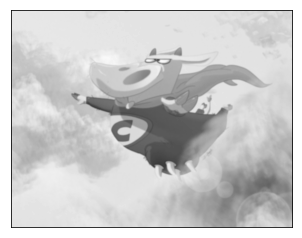

In [17]:
import numpy as np
import cv2
from matplotlib import pyplot as plt # cargamos la librería matplotlib

img = cv2.imread('supercow.jpg',0) # lee la imagen
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic') # el tipo de interpolación nos permite ajustar la visualización de la imagen
plt.xticks([]), plt.yticks([]) # Esconde los ticks de los ejes
plt.show() #muestra la imagen

# 2. Comandos básicos para videos

## 2.1 Capturar video de una cámara

Para capturar el video, se debe crear un objeto $\verb|VideoCapture|$. Su argumento puede ser o el índice del dispositivo o el nombre de un archivo de video. El índice del dispositivo solo es el número que especifíca cuál cámara. Normalmente se tiene solo una cámara conectada, por tanto se pasará un 0 o un -1. La segunda cámara sera el 1 y así continuamente. Posteriormente se puede capturar trama a trama. Al final se debe recordar liberar la captura.

In [ ]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read() #captura trama a trama. Retorna True o False
                            # de acuerdo a si es correcta la lectura de la trama

    #las operaciones sobre la trama vienen aquí. En este momento la convierte 
    #en escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray) #muestra la trama resultante
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
#Cuando todo se termina se libera la captura
cap.release() #libera el recurso
cv2.destroyAllWindows() #cierra las ventanas activas

# Puede ocurrir que cap no inicialice la captura correctamente. En ese caso se
# puede utilizar el método cap.isOpened(). Si es True, está bien.
# de otra forma se puede abrir con cap.open()


In [ ]:
# Igualmente se puede accesar a algunas de las características del video
# usando cap.get(propId) donde propId es un número de 0 a 18. Cada
# número denota una característica. Algunos de los valores pueden modificarse
# usando cap.set(propId, value), donde value es el nuevo valor que se desea
# fijar.

import numpy as np
import cv2
cap = cv2.VideoCapture(0)
cap.set(3, 320) #características de ancho y alto y el nuevo valor para cada una de ellas
cap.set(4, 240)

while(True):
    ret, frame = cap.read() #captura trama a trama. Retorna True o False
                            # de acuerdo a sí es correcta la lectura de la trama

    #las operaciones sobre la trama vienen aquí.
    cv2.imshow('frame',frame) #muestra la trama resultante
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
#Cuando todo se termina se libera la captura
# width = cap.get(3) #por defecto es 640x480
# print(width)
# height = cap.get(4)
# print(height)
cap.release()
cv2.destroyAllWindows()

## 2.2 Visualizar video de un archivo

Se procede como en la captura pero se cambia el índice por el nombre del video.

In [1]:
import numpy as np
import cv2
cap = cv2.VideoCapture('video.mp4')
while(cap.isOpened()): 
    ret, frame = cap.read()
    if ret == True: #si no se utiliza se tiene un error cuando terminan las tramas y 
        #se congela el video
        cv2.imshow('frame',frame)
        cv2.waitKey(int(1000/60))
        if cv2.waitKey(1) & 0xFF == ord('q'):
             break
    else: #si no se utiliza se tiene un error cuando terminan las tramas y 
        #se congela el video
        break
        
cap.release()
cv2.destroyAllWindows()

## 2.3 Almacenar un video

Dado que cuando se caputra un video se realiza trama a trama, para almacenarlo se requiren algunos pasos adicionales. Primero se debe crear un objeto $\verb|VideoWriter|$. Se debe especificar el nombre del archivo de salida. Posteriormente se debe especificar el código $\verb|FourCC|$. EL número de tramas por segundo (fps), el tamaño de la trama y el flag $\verb|isColor|$.

El código $\verb|FourCC|$ es un código de 4 bytes usando para especificar el codec del video, que depende de la plataforma. Los más apropiados son:

1. Para fedora: DIVX, XVID, MJPG, X264, WMV1, WMV2.
2. Para Windows: DIVX


**Ejemplo**

El siguiente código  hace una captura de la cámara, gira cada trama de forma vertical y lo guarda

In [ ]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)
#define el codec y crea el objeto VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
while(cap.isOpened()): #se captura el video mientras el recurso de la cámara se encuentre en uso
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)
        # Escribe la trama girada (si se pasa a gris hay un problema
        #de reproducción en windows, no así en python)
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
# libera todo una vez que la captura se termina
cap.release()
out.release()
cv2.destroyAllWindows()

# 3. Funciones para dibujar

Todas las funciones para dibujar tienen generalmente los siguientes argumentos:

1. $\verb|img|$ : la imagen donde se quieren dibujar las formas.
2. $\verb|color|$: el color de la forma. Para BGR se pasa como una tupla (e.g. (255,0,0) para azul). Para escala de grises solo se pasa el valor escalar.
3. $\verb|thickness|$: es el espesor de la línea o el círculo. Si se pasa -1 para figuras cerradas, se rellenará la forma. El valor por defecto es 1.
4. $\verb|lineType|$: es el tipo de línea, e.g. 8-connected, anti-aliased, etc. Por defecto es 8-connected. $\verb|cv2.LINE_AA|$ muestra una línea anti-aliased ideal para curvas. En la imagen se muestran las conexiones de 8 y 4 px. Para el anti-aliased lo que se hace es intentar engañar el ojo aumentando la resolución, dividiendo cada píxel en sub-píxeles.



## 3.1 Líneas

In [2]:
import numpy as np
import cv2

img = np.zeros((512,512,3), np.uint8) #crea una imagen negra de tamaño 512x512
# y BGR
img = cv2.line(img,(0,0),(511,511),(255,0,0),5) #dibuja una línea azul diagonal
# con 5 px de espesor con inicio en 0,0 y final en 511,511
cv2.imshow('imagen',img)
cv2.waitKey(0) #si no se pone se congela y bloquea la ventana
cv2.destroyAllWindows() #idem

## 3.2 Rectángulos

In [9]:
img = np.zeros((512,512,3), np.uint8) #crea una imagen negra de tamaño 512x512
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
#para el rectángulo se pasan las esquinas superior izauierda e inferior
#derecha, el color y el espesor.
cv2.imshow('imagen',img)
cv2.waitKey(0) #si no se pone se congela y bloque la ventana
cv2.destroyAllWindows() #idem

## 3.3 Círculos



In [4]:
img = np.zeros((512,512,3), np.uint8) #crea una imagen negra de tamaño 512x512
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)
# se necesita el centro y el radio
cv2.imshow('imagen',img)
cv2.waitKey(0) #si no se pone se congela y bloque la ventana
cv2.destroyAllWindows() #idem

## 3.4 Elípses

Para las elipses se requiere un mayor número de argumentos. El centro, la longitud de los ejes (eje mayor y eje mejor), el ángulo de rotación en sentido anti-horario. El angulo inicial y ángulo final de la medida del arco medida en sentido antio-horario respecto al eje mayor (en grados centígrados).

In [5]:
img = np.zeros((512,512,3), np.uint8) #crea una imagen negra de tamaño 512x512
img = cv2.ellipse(img,(256,256),(100,50),0,0,270,(0,255,0),-1)
cv2.imshow('imagen',img)
cv2.waitKey(0) #si no se pone se congela y bloque la ventana
cv2.destroyAllWindows() #idem

## 3.5 Polígonos

Para graficar un polígono se necesita primero las coordenadas de los vértices. Se deben organizar en un arreglo de dimensión $\verb|filas|\times\verb|1|\times\verb|2|$, donde las $\verb|filas|$ son el número de vértices de tipo $\verb|int32|$.

In [6]:
img = np.zeros((512,512,3), np.uint8) #crea una imagen negra de tamaño 512x512
vertices = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
print('La dimensión original es: ', vertices.shape)
vertices= vertices.reshape((-1,1,2)) #queda como una lista de listas
# el -1 es para mantener la dimensión del arreglo, en este caso de 4 filas
print('La nueva dimensión es: ', vertices.shape)
img = cv2.polylines(img,[vertices],False,(0,255,255))
# si el tercer argumento es False, se juntan todas las líneas pero no
# se crea una forma cerrada
cv2.imshow('imagen',img)
cv2.waitKey(0) #si no se pone se congela y bloque la ventana
cv2.destroyAllWindows() #idem

#la función polylines() se puede usar para graficar múltiples líneas.
#En ese caso se crean múltiples líneas y se pasan a la función.

La dimensión original es:  (4, 2)
La nueva dimensión es:  (4, 1, 2)


## 3.6 Texto

Para agregar texto a una imagen se deben especificar los siguientes parámetros: texto, coordenadas (esquina superior izquierda), fuente, escala, color, espesor, tipo de línea, entre otros. Los tipos de letra en OpenCV son:

- Hershey Simplex
- Hershey Plain
- Hershey Duplex
- Hershey Complex
- Hershey Triplex
- Hershey Complex Small
- Hershey Script Simplex
- Hershey Script Complex

In [7]:
img = np.zeros((512,512,3), np.uint8) #crea una imagen negra de tamaño 512x512
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
cv2.imshow('imagen',img)
cv2.waitKey(0) #si no se pone se congela y bloque la ventana
cv2.destroyAllWindows() #idem

# 4. Uso del mouse como pincel

**Ejemplo**

En el siguiente ejemplo se dibuja un círculo sobre una imagen donde se haga doble click. Primero imprimiremos los posibles eventos que se pueden manejar.

In [8]:
import cv2
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [14]:
import cv2
import numpy as np
# función de llamado para el mouse
def draw_circle(event,x,y,flags,param): #los argumentos son los determinados para
    #el callback del mouse
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1) #función para graficar el círculo
        # creamos una imagen negra

img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27: #sale con Esc
        break
cv2.destroyAllWindows()

**Ejercicio 1**

Crea una matriz que simule un «tablero de ajedrez», tal que las casillas negras contienen 0 y las casillas blancas contienen un 1. Muestra la imagen y guárdala.

In [4]:
#espacio para la solución del ejercicioim 1.
tablero = np.zeros((800,800,3), np.uint8)
total = 800
celda = int(800/8)
inicio = 0
b = True
for fila in range(1,9):
    for columna in range(1,9):
        if b:
            color = (255,255,255)
            b = False
        else:
            color = (0,0,0)
            b = True
        tablero = cv2.rectangle(tablero,(celda*columna - 100, celda*fila-100),(celda*columna, celda*fila),color, cv2.FILLED)
    b = False if b else True
cv2.imshow('imagen',tablero)
cv2.waitKey(0) #si no se pone se congela y bloque la ventana
cv2.destroyAllWindows() #idem

**Ejercicio 2**

Ahora simula un tablero de «damas chinas» y guárdalo como una imagen.


In [ ]:
#espacio para la solución del ejercicio 2